In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")

from time import time

In [16]:
# galaxy_name = "gal10"
# galaxy_type = "firebox"
# redshift = "0.0"
# directory_name = "voronoi_1e6"


galaxy_name = "m12i_res7100_md"
galaxy_type = "zoom_in"
redshift = "0.0"
directory_name = "voronoi_1e6"

# wavelength_max = 1000 # um
# wavelength_min = 8 # um

wavelength_max = int(1e3) # um
wavelength_min = int(1e-1) # um



BASE_FILE_DIR = f"/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius/{galaxy_type}/z{redshift}/{galaxy_name}/voronoi_1e6"

# Total SED

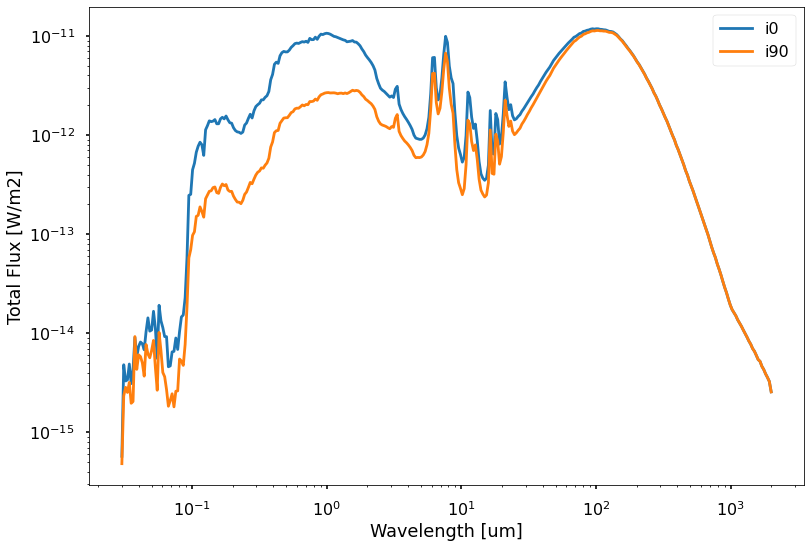

In [17]:
total_sed_i0 = np.loadtxt(fname=f"{BASE_FILE_DIR}/{galaxy_name}_i0_sed.dat")
total_sed_i90 = np.loadtxt(fname=f"{BASE_FILE_DIR}/{galaxy_name}_i90_sed.dat")

# Plot the sed 
plt.plot(total_sed_i0[:,0], total_sed_i0[:,0]*total_sed_i0[:,1], label = "i0")
plt.plot(total_sed_i90[:,0], total_sed_i90[:,0]*total_sed_i90[:,1], label = "i90")

plt.xlabel("Wavelength [um]")
plt.ylabel("Total Flux [W/m2]")
plt.legend()

plt.xscale("log")
plt.yscale("log")

plt.show()

# SED per cell

In [4]:
%%time

# Get only the characteristic wavelength
wavelengths = np.loadtxt(fname=f"{BASE_FILE_DIR}/{galaxy_name}_grid_radiationField_wavelengths.dat")[:,0] 

wavelength_indices = np.where(
    (wavelength_min <= wavelengths) &
    (wavelengths <= wavelength_max)
)[0]

wavelengths = wavelengths[wavelength_indices] # use only the wavelengths in the range defined by the user

radiation_field_indices = np.array(wavelength_indices) + 1

print("Starting to read radiation field.")
start_time = time()

radiationField = np.loadtxt(
    fname=f"{BASE_FILE_DIR}/{galaxy_name}_grid_radiationField_J.dat", 
    usecols=radiation_field_indices,
) # I am not importing the cell indices

end_time = time()
print(f"Took {np.round((end_time - start_time)/60, 3)} minutes")

Starting to read radiation field.
Took 3.081 minutes
CPU times: user 2min 52s, sys: 11.6 s, total: 3min 3s
Wall time: 3min 4s


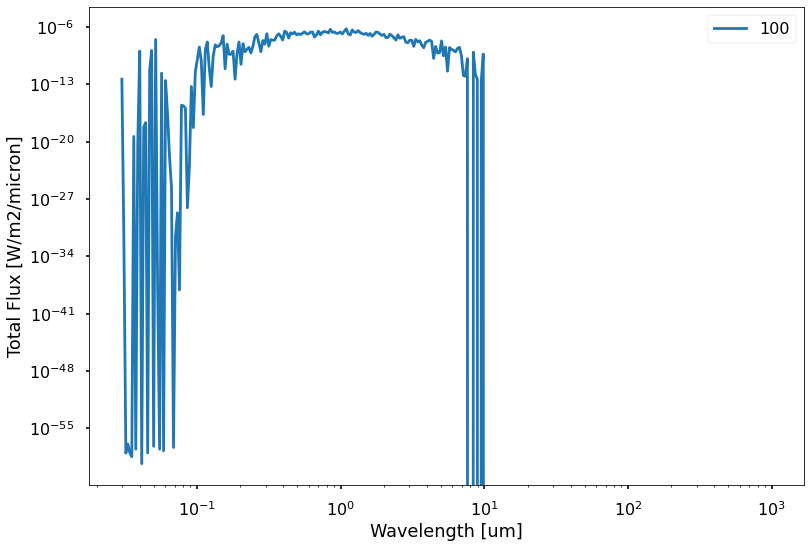

In [7]:
# Calculate Sed for the cell of interest

for cell_number in [int(1e2)]:
    
    radiationFieldCell = radiationField[cell_number]
    
    # Plot the sed 
    plt.plot(wavelengths, radiationFieldCell, label = cell_number)
    
    plt.xlabel("Wavelength [um]")
    plt.ylabel("Total Flux [W/m2/micron]")
    plt.legend()

    plt.xscale("log")
    plt.yscale("log")

    plt.show()
    

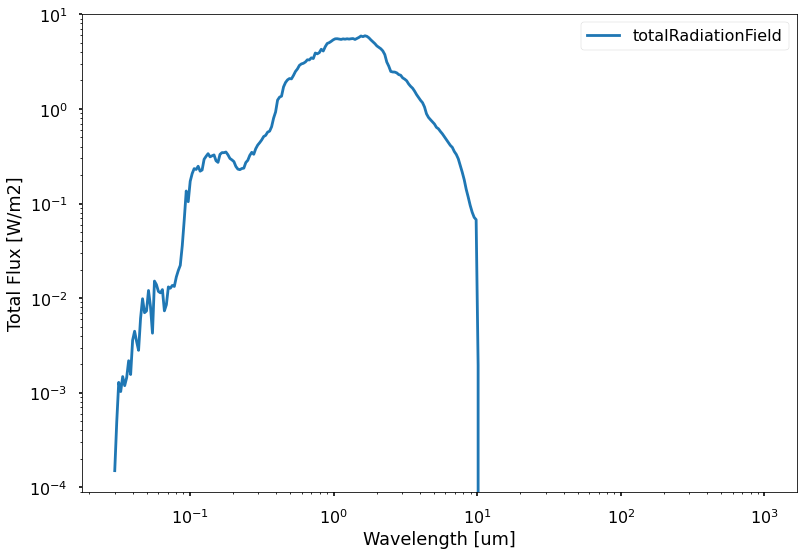

In [11]:
totalRadiationField = [np.sum(radiationField[:,i]) for i in range(len(radiationField[0]))]

# Plot the sed 
plt.plot(wavelengths, wavelengths*totalRadiationField, label = "totalRadiationField")

plt.xlabel("Wavelength [um]")
plt.ylabel("Total Flux [W/m2]")
plt.legend()

plt.xscale("log")
plt.yscale("log")

plt.show()

In [15]:
for i in range(len(totalRadiationField)):
    print(f"{wavelengths[i]} ---- {totalRadiationField[i]}")

0.03 ---- 0.005012647339286955
0.03097015242 ---- 0.015886283806841407
0.03197167804 ---- 0.04028527481649891
0.0330055914 ---- 0.03122304027580521
0.03407293989 ---- 0.04354746716327992
0.03517480473 ---- 0.033812664737367215
0.03631230213 ---- 0.03981480252554737
0.03748658439 ---- 0.05819255997947268
0.03869884108 ---- 0.040314124257613645
0.03995030023 ---- 0.08995244425348013
0.04124222959 ---- 0.10838469002321478
0.04257593789 ---- 0.08197842185350473
0.0439527762 ---- 0.06395413541548763
0.04537413928 ---- 0.13501498052730115
0.04684146698 ---- 0.21040599853124958
0.04835624574 ---- 0.14511591991872064
0.04992001004 ---- 0.1466987632687045
0.051534344 ---- 0.2338244284122734
0.05320088296 ---- 0.15314698899499382
0.05492131514 ---- 0.07765310902642682
0.05669738338 ---- 0.2670951633323177
0.05853088684 ---- 0.23716556414207968
0.0604236829 ---- 0.19465085689300385
0.06237768898 ---- 0.182407656994573
0.06439488452 ---- 0.19118390250848893
0.06647731296 ---- 0.11046033723757659
0